#### The purpose of the case study is to classify a given silhouette as one of three different types of vehicle, using a set of features extracted from the silhouette. The vehicle may be viewed from one of many different angles.Four "Corgie" model vehicles were used for the experiment: a double-decker bus, Chevrolet van, Saab 9000 and an Opel Manta 400 cars. This particular combination of vehicles was chosen with the expectation that the bus, van and either one of the cars would be readily distinguishable, but it would be more difficult to distinguish between the cars.
To perform:
    Data Pre-processing 
    Understanding the attributes 
    PCA from scikit learn
    Support vector machines and accuracy

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
vehicle = pd.read_csv("vehicle.csv")

In [3]:
vehicle.head()

compactness  circularity  distance_circularity  radius_ratio  \
0           95         48.0                  83.0         178.0   
1           91         41.0                  84.0         141.0   
2          104         50.0                 106.0         209.0   
3           93         41.0                  82.0         159.0   
4           85         44.0                  70.0         205.0   

   pr.axis_aspect_ratio  max.length_aspect_ratio  scatter_ratio  \
0                  72.0                       10          162.0   
1                  57.0                        9          149.0   
2                  66.0                       10          207.0   
3                  63.0                        9          144.0   
4                 103.0                       52          149.0   

   elongatedness  pr.axis_rectangularity  max.length_rectangularity  \
0           42.0                    20.0                        159   
1           45.0                    19.0                        143   
2           32.0                    23.0                        158   
3           46.0                    19.0                        143   
4           45.0                    19.0                        144   

   scaled_variance  scaled_variance.1  scaled_radius_of_gyration  \
0            176.0              379.0                      184.0   
1            170.0              330.0                      158.0   
2            223.0              635.0                      220.0   
3            160.0              309.0                      127.0   
4            241.0              325.0                      188.0   

   scaled_radius_of_gyration.1  skewness_about  skewness_about.1  \
0                         70.0             6.0              16.0   
1                         72.0             9.0              14.0   
2                         73.0            14.0               9.0   
3                         63.0             6.0              10.0   
4                        127.0             9.0              11.0   

   skewness_about.2  hollows_ratio class  
0             187.0            197   van  
1             189.0            199   van  
2             188.0            196   car  
3             199.0            207   van  
4             180.0            183   bus

In [4]:
vehicle.shape

(846, 19)

In [5]:
vehicle.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    841 non-null float64
distance_circularity           842 non-null float64
radius_ratio                   840 non-null float64
pr.axis_aspect_ratio           844 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  845 non-null float64
elongatedness                  845 non-null float64
pr.axis_rectangularity         843 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                843 non-null float64
scaled_variance.1              844 non-null float64
scaled_radius_of_gyration      844 non-null float64
scaled_radius_of_gyration.1    842 non-null float64
skewness_about                 840 non-null float64
skewness_about.1               845 non-null float64
skewness_about.2               845 non-null float64
hollows_ratio    

There are few null values in the data as can be seen in basic info . All features are numeric and class which is target label is categorical.

In [6]:
vehicle.describe().T

count        mean         std    min     25%  \
compactness                  846.0   93.678487    8.234474   73.0   87.00   
circularity                  841.0   44.828775    6.152172   33.0   40.00   
distance_circularity         842.0   82.110451   15.778292   40.0   70.00   
radius_ratio                 840.0  168.888095   33.520198  104.0  141.00   
pr.axis_aspect_ratio         844.0   61.678910    7.891463   47.0   57.00   
max.length_aspect_ratio      846.0    8.567376    4.601217    2.0    7.00   
scatter_ratio                845.0  168.901775   33.214848  112.0  147.00   
elongatedness                845.0   40.933728    7.816186   26.0   33.00   
pr.axis_rectangularity       843.0   20.582444    2.592933   17.0   19.00   
max.length_rectangularity    846.0  147.998818   14.515652  118.0  137.00   
scaled_variance              843.0  188.631079   31.411004  130.0  167.00   
scaled_variance.1            844.0  439.494076  176.666903  184.0  318.00   
scaled_radius_of_gyration    844.0  174.709716   32.584808  109.0  149.00   
scaled_radius_of_gyration.1  842.0   72.447743    7.486190   59.0   67.00   
skewness_about               840.0    6.364286    4.920649    0.0    2.00   
skewness_about.1             845.0   12.602367    8.936081    0.0    5.00   
skewness_about.2             845.0  188.919527    6.155809  176.0  184.00   
hollows_ratio                846.0  195.632388    7.438797  181.0  190.25   

                               50%    75%     max  
compactness                   93.0  100.0   119.0  
circularity                   44.0   49.0    59.0  
distance_circularity          80.0   98.0   112.0  
radius_ratio                 167.0  195.0   333.0  
pr.axis_aspect_ratio          61.0   65.0   138.0  
max.length_aspect_ratio        8.0   10.0    55.0  
scatter_ratio                157.0  198.0   265.0  
elongatedness                 43.0   46.0    61.0  
pr.axis_rectangularity        20.0   23.0    29.0  
max.length_rectangularity    146.0  159.0   188.0  
scaled_variance              179.0  217.0   320.0  
scaled_variance.1            363.5  587.0  1018.0  
scaled_radius_of_gyration    173.5  198.0   268.0  
scaled_radius_of_gyration.1   71.5   75.0   135.0  
skewness_about                 6.0    9.0    22.0  
skewness_about.1              11.0   19.0    41.0  
skewness_about.2             188.0  193.0   206.0  
hollows_ratio                197.0  201.0   211.0

In [7]:
vehicle.apply(lambda x: sum(x.isnull()))         # null values in each columns

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [8]:
vehicle1 = vehicle.copy()           #copy the dataframe to another dataframe to preserve original dataframe

In [9]:
vehicle1.shape

(846, 19)

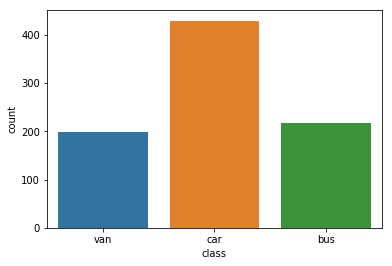

In [10]:
sns.countplot(vehicle1['class'])   # classes count

In [11]:
vehicle1['class'].value_counts()

car    429
bus    218
van    199
Name: class, dtype: int64

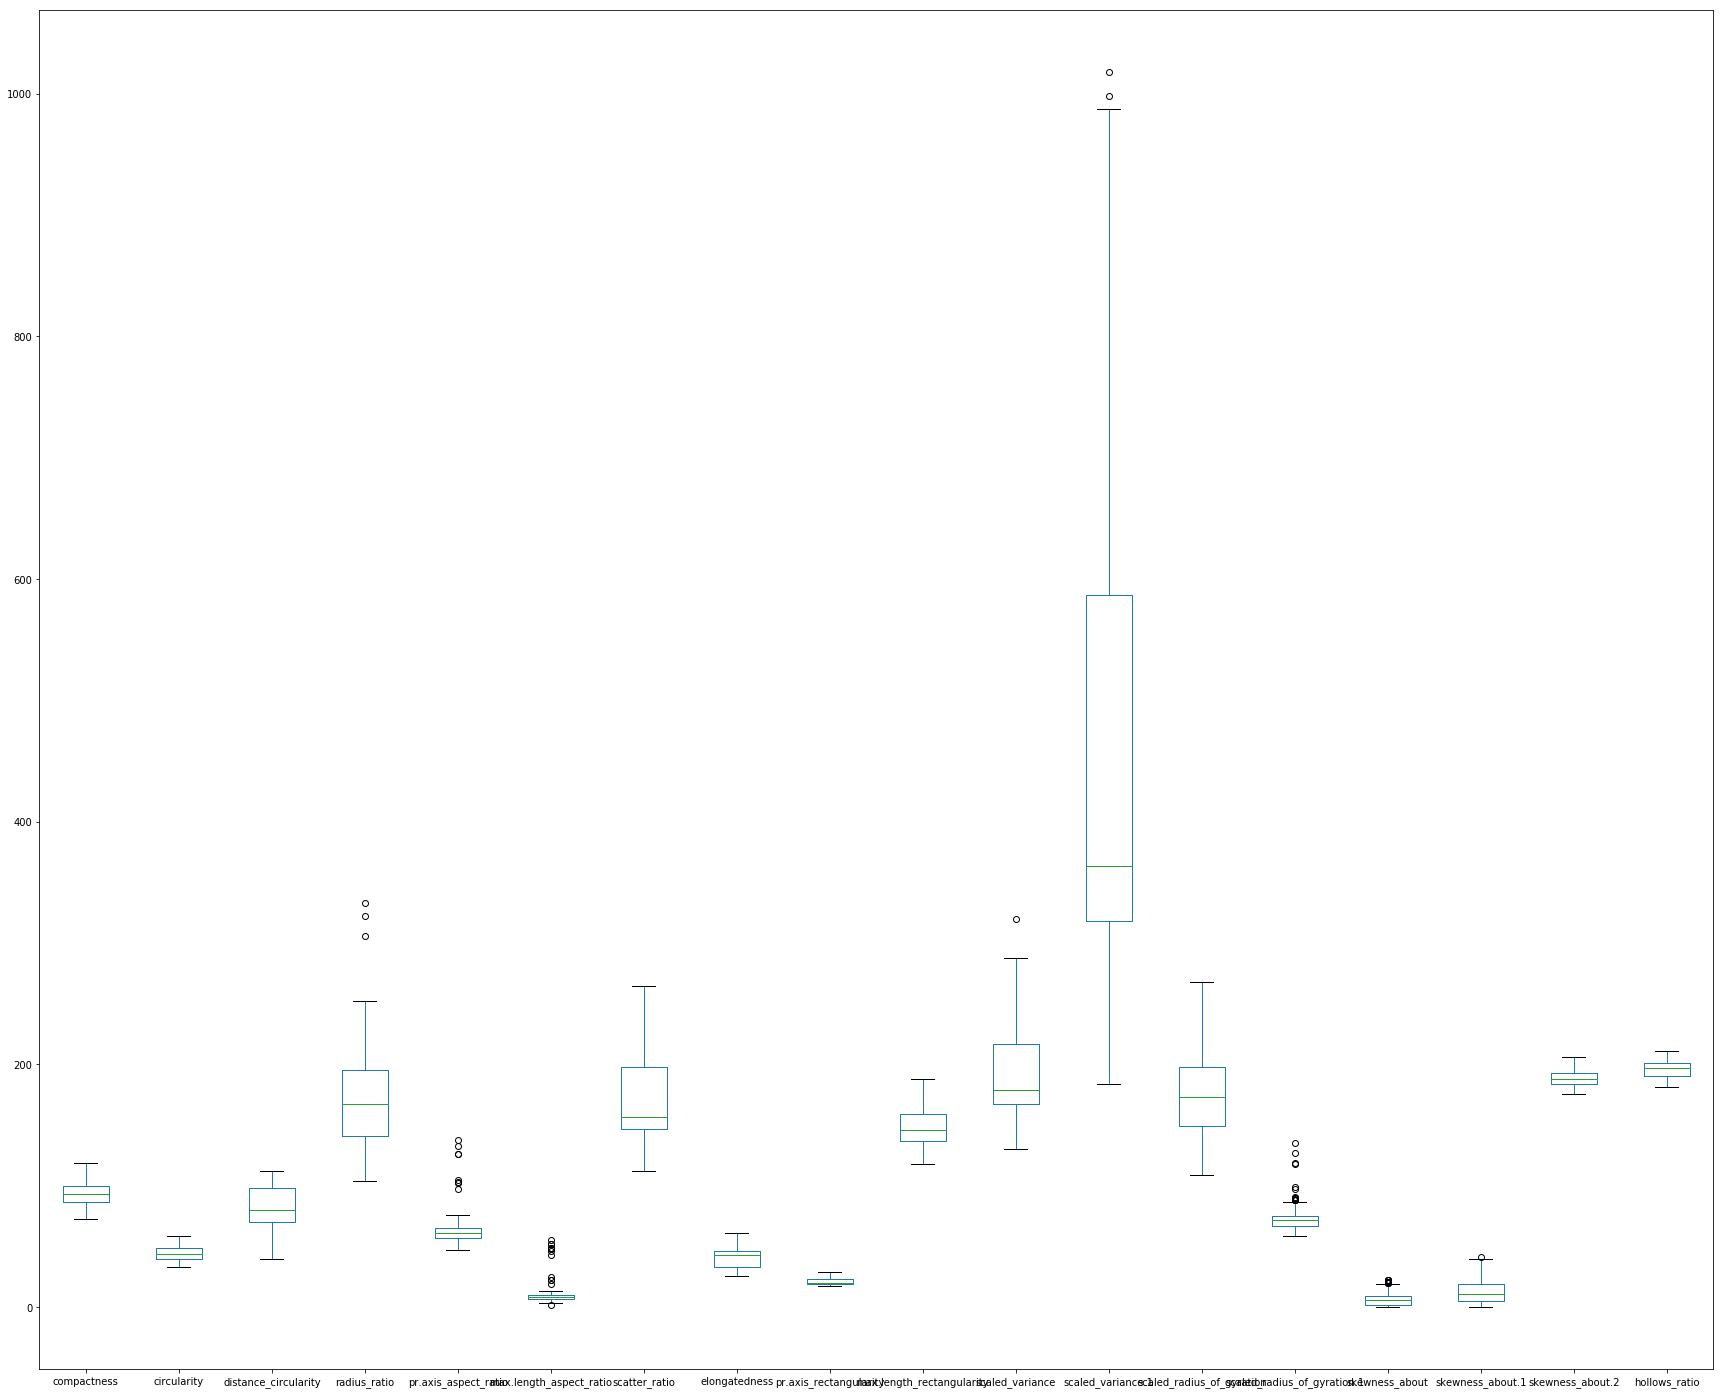

In [12]:
vehicle1.plot(kind='box',figsize=(30,25))

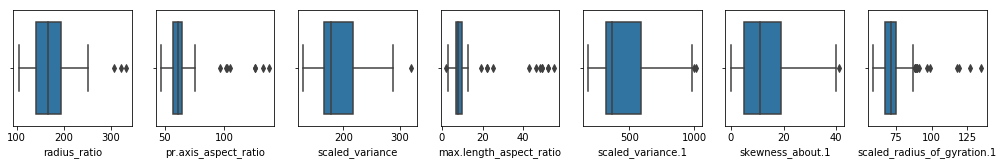

In [13]:
plt.figure(figsize= (20,20))
plt.subplot(8,8,1)
sns.boxplot(vehicle1['radius_ratio'])
plt.subplot(8,8,2)
sns.boxplot(vehicle1['pr.axis_aspect_ratio'])
plt.subplot(8,8,3)
sns.boxplot(vehicle1['scaled_variance'])
plt.subplot(8,8,4)
sns.boxplot(vehicle1['max.length_aspect_ratio'])
plt.subplot(8,8,5)
sns.boxplot(vehicle1['scaled_variance.1'])
plt.subplot(8,8,6)
sns.boxplot(vehicle1['skewness_about.1'])
plt.subplot(8,8,7)
sns.boxplot(vehicle1['scaled_radius_of_gyration.1'])

##### We can impute the missing values by median rather than deleting them as dataset is small. Also, from boxplot we can see outliers present in many features.These outliers needs to be treated.


In [14]:
vehicle1.fillna(vehicle1.median(),axis =0,inplace=True)

In [15]:
vehicle1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
compactness                    846 non-null int64
circularity                    846 non-null float64
distance_circularity           846 non-null float64
radius_ratio                   846 non-null float64
pr.axis_aspect_ratio           846 non-null float64
max.length_aspect_ratio        846 non-null int64
scatter_ratio                  846 non-null float64
elongatedness                  846 non-null float64
pr.axis_rectangularity         846 non-null float64
max.length_rectangularity      846 non-null int64
scaled_variance                846 non-null float64
scaled_variance.1              846 non-null float64
scaled_radius_of_gyration      846 non-null float64
scaled_radius_of_gyration.1    846 non-null float64
skewness_about                 846 non-null float64
skewness_about.1               846 non-null float64
skewness_about.2               846 non-null float64
hollows_ratio    

Now no null values in the data after imputation

From boxplot features like radius_ratio , pr.axis_aspect_ratio, max.length_aspect_ratio ,scaled_variance,scaled_variance.1,
scaled_radius_of_gyration.1,,skewness_about,skewness_about.1  have outliers and needs to be treated before modelling

In [16]:
for col in vehicle.columns[:-1]:                     #Treat outliers by median value
    q1=vehicle1[col].quantile(0.25)
    q3=vehicle1[col].quantile(0.75)
    iqr=q3-q1
    low=q1-1.5*iqr
    high=q3+1.5*iqr
    vehicle1.loc[(vehicle1[col] < low) | (vehicle1[col] > high),col] = vehicle1[col].median() 
   

In [17]:
vehicle1.shape

(846, 19)

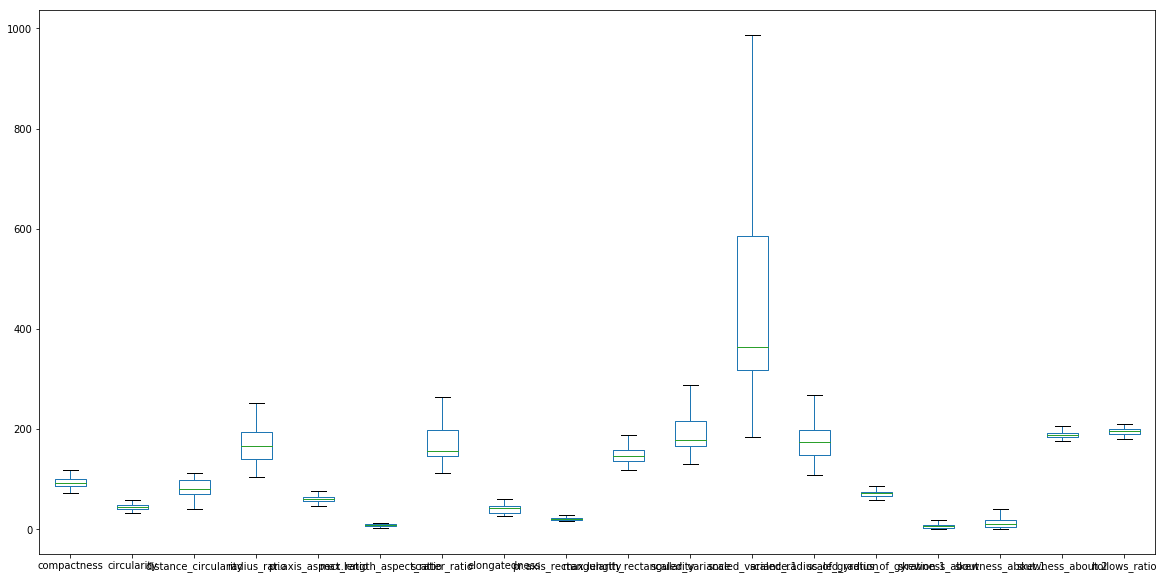

In [18]:
vehicle1.plot(kind='box', figsize=(20,10))

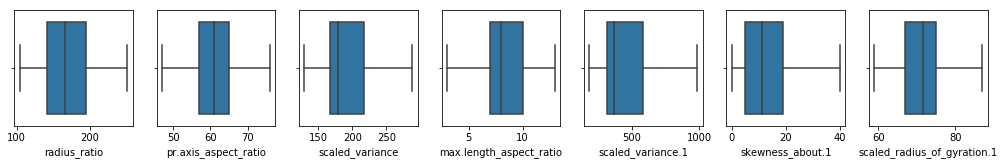

In [19]:
plt.figure(figsize= (20,20))
plt.subplot(8,8,1)
sns.boxplot(vehicle1['radius_ratio'])
plt.subplot(8,8,2)
sns.boxplot(vehicle1['pr.axis_aspect_ratio'])
plt.subplot(8,8,3)
sns.boxplot(vehicle1['scaled_variance'])
plt.subplot(8,8,4)
sns.boxplot(vehicle1['max.length_aspect_ratio'])
plt.subplot(8,8,5)
sns.boxplot(vehicle1['scaled_variance.1'])
plt.subplot(8,8,6)
sns.boxplot(vehicle1['skewness_about.1'])
plt.subplot(8,8,7)
sns.boxplot(vehicle1['scaled_radius_of_gyration.1'])

###### Now outlier are treated and data is ready for feature selection and univariate and bivariate analysis 
###### Before that we convert target label to numerical

In [20]:
import sklearn.preprocessing as preprocessing
le = preprocessing.LabelEncoder()
vehicle1["class"] = le.fit_transform(vehicle1["class"])

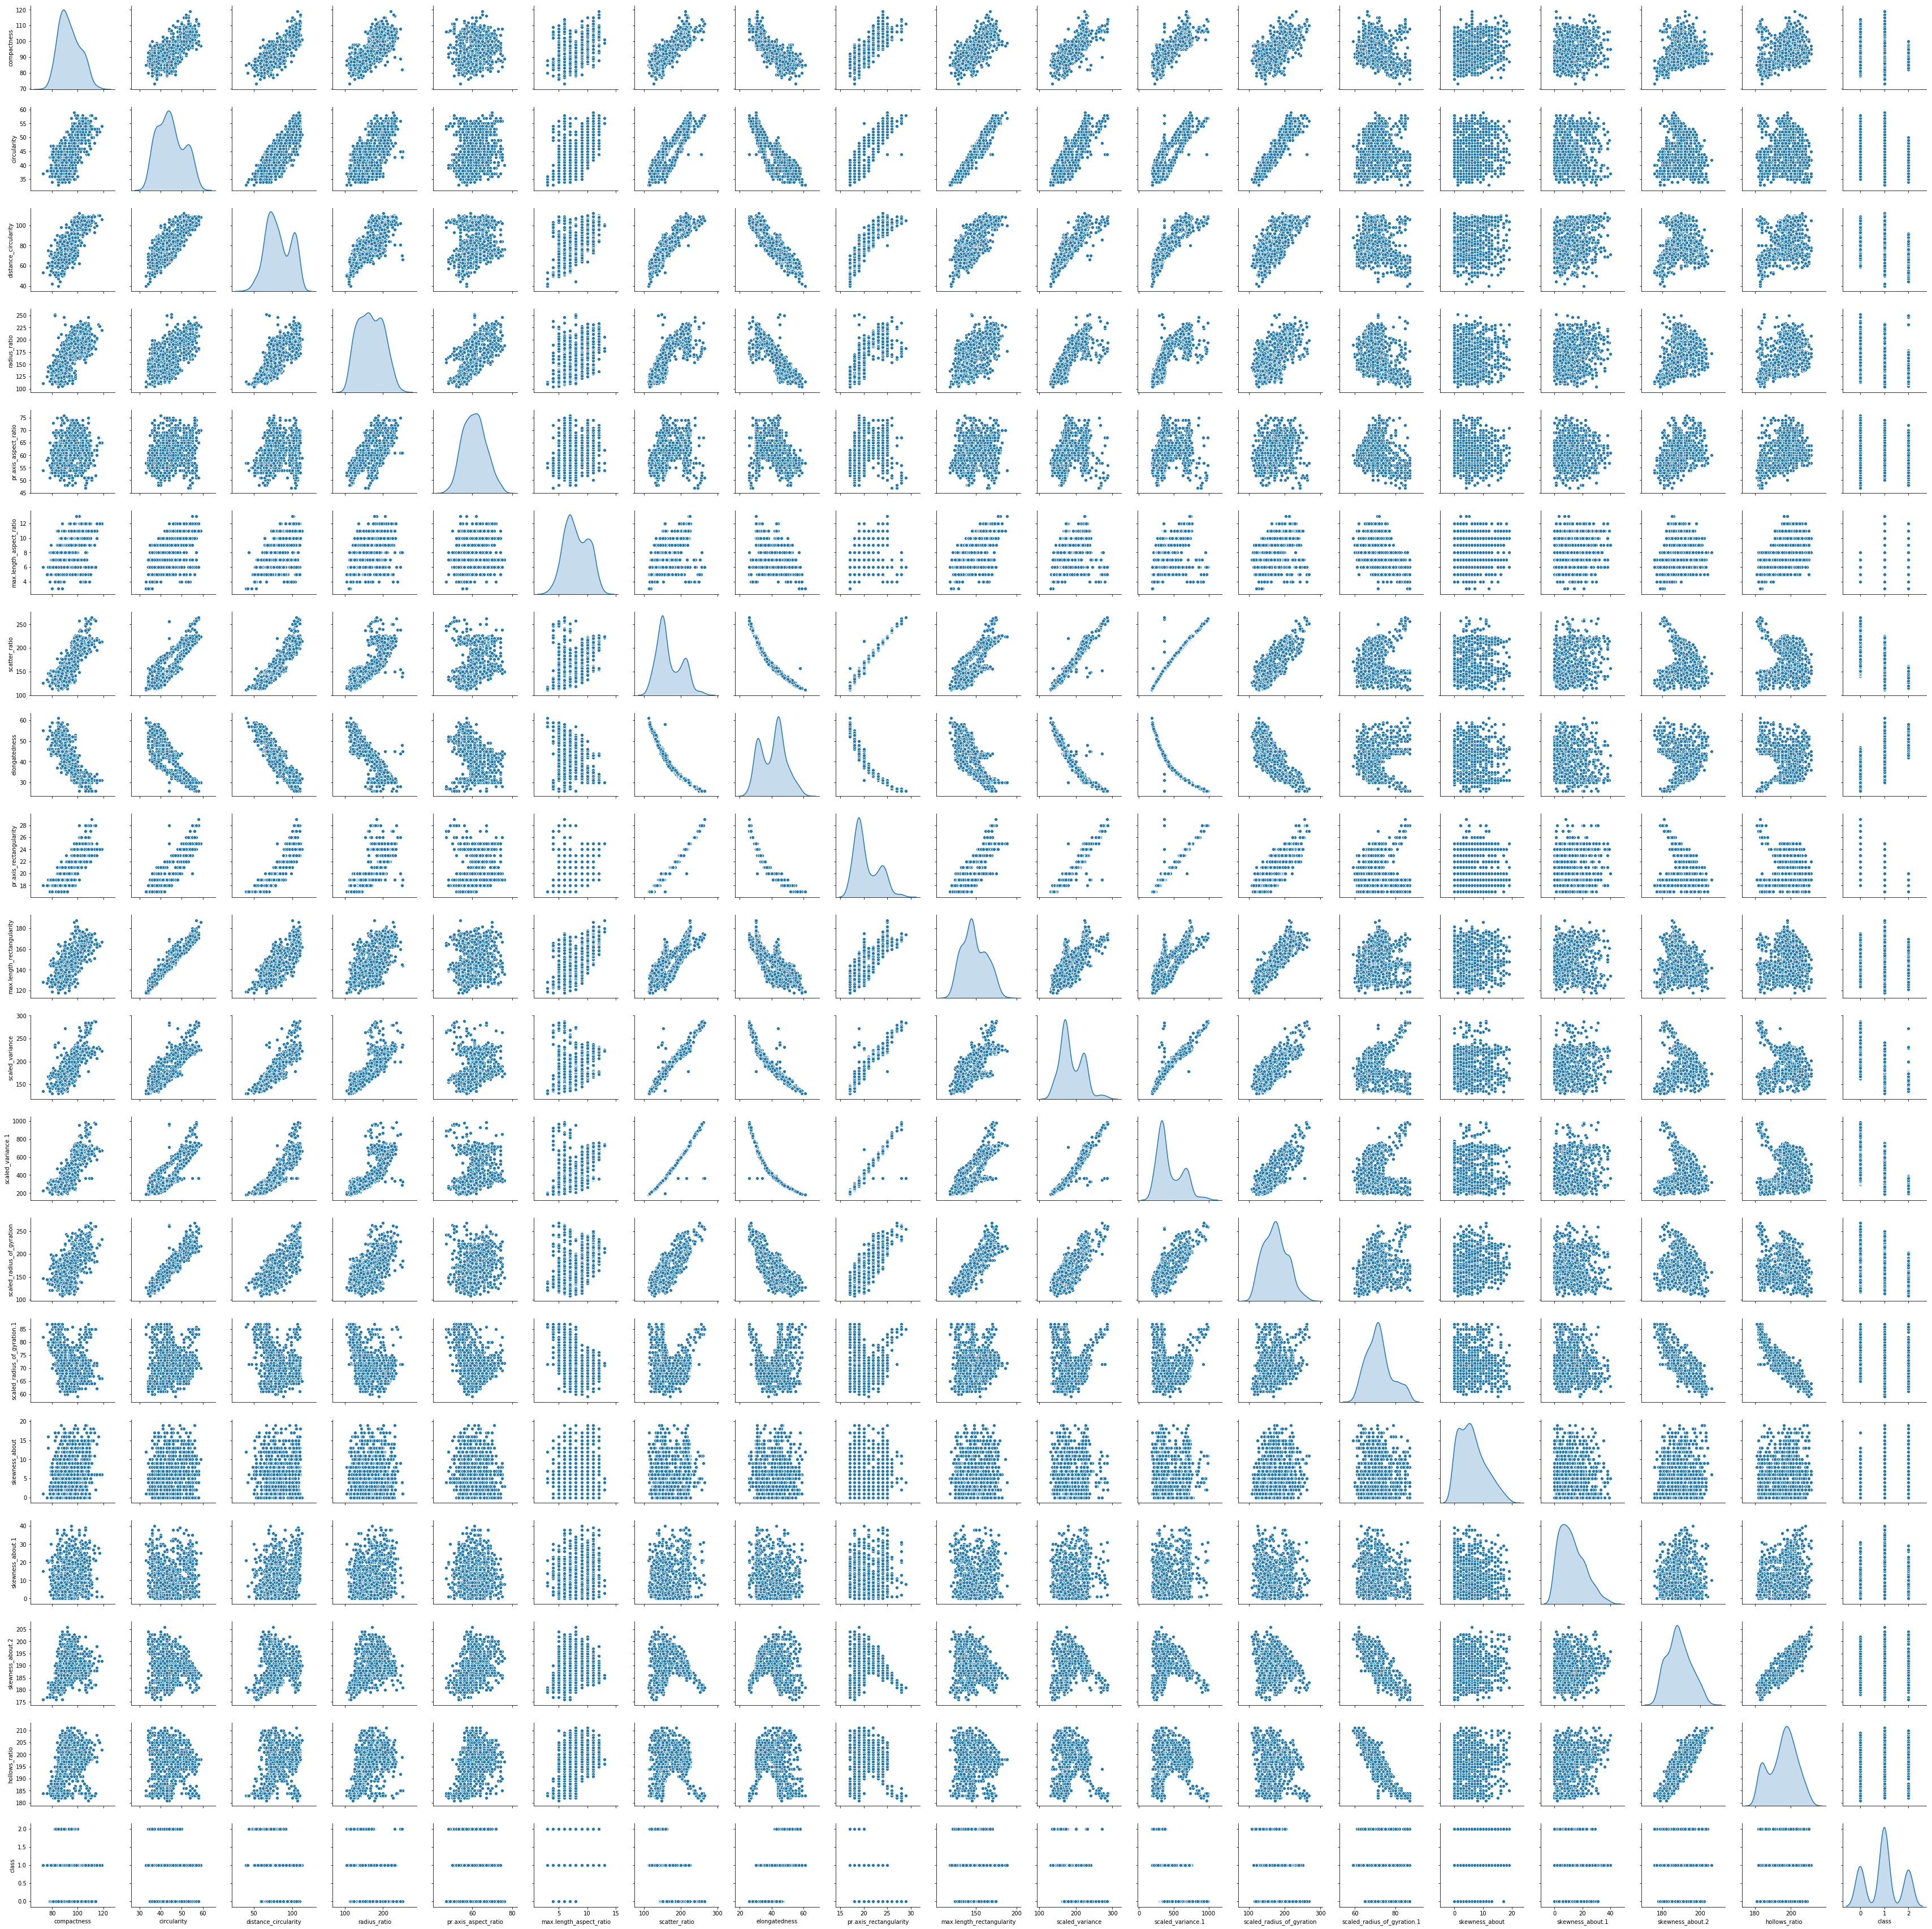

In [21]:
sns.pairplot(vehicle1,diag_kind='kde')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001D29730E7F0>,
      dtype=object)

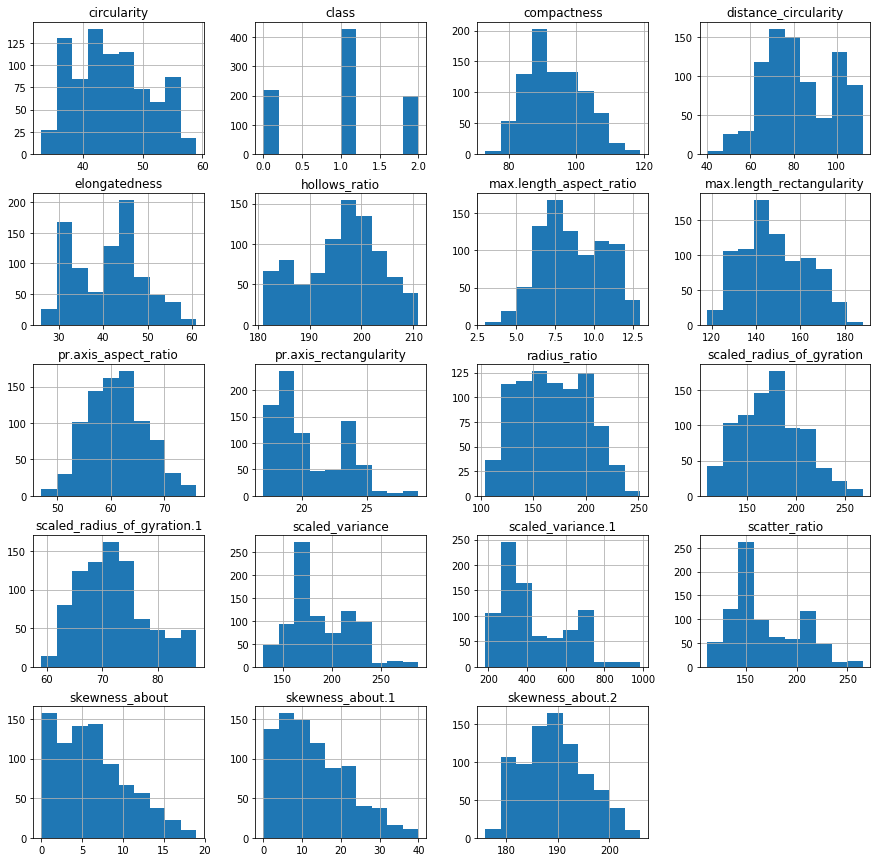

In [22]:
vehicle1.hist(figsize=(15,15))

In [23]:
vehicle1.skew()

compactness                    0.381271
circularity                    0.264928
distance_circularity           0.108718
radius_ratio                   0.118680
pr.axis_aspect_ratio           0.161223
max.length_aspect_ratio        0.090367
scatter_ratio                  0.608710
elongatedness                  0.046951
pr.axis_rectangularity         0.774406
max.length_rectangularity      0.256359
scaled_variance                0.602557
scaled_variance.1              0.820685
scaled_radius_of_gyration      0.279910
scaled_radius_of_gyration.1    0.535057
skewness_about                 0.624590
skewness_about.1               0.674715
skewness_about.2               0.249985
hollows_ratio                 -0.226341
class                          0.031106
dtype: float64

Most of the data attributes seems to be normally distributed
pr.axis_rectangularity,scaled variance1, skewness about,skewness about1 and scatter_ratio, are right skewed .
   

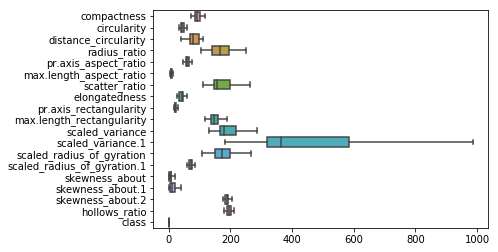

In [24]:
sns.boxplot(data=vehicle1, orient="h")   # we might undergo  feature scaling for normalization

In [25]:
vehicle1_corr=vehicle1.corr()
vehicle1_corr

compactness  circularity  distance_circularity  \
compactness                     1.000000     0.684887              0.789928   
circularity                     0.684887     1.000000              0.792320   
distance_circularity            0.789928     0.792320              1.000000   
radius_ratio                    0.721925     0.638280              0.794222   
pr.axis_aspect_ratio            0.192864     0.203253              0.244332   
max.length_aspect_ratio         0.499928     0.560470              0.666809   
scatter_ratio                   0.812620     0.847938              0.905076   
elongatedness                  -0.788750    -0.821472             -0.911307   
pr.axis_rectangularity          0.813694     0.843400              0.893025   
max.length_rectangularity       0.676143     0.961318              0.774527   
scaled_variance                 0.769871     0.802768              0.869584   
scaled_variance.1               0.806170     0.827462              0.883943   
scaled_radius_of_gyration       0.585243     0.925816              0.705771   
scaled_radius_of_gyration.1    -0.246681     0.068745             -0.229353   
skewness_about                  0.197308     0.136351              0.099107   
skewness_about.1                0.156348    -0.009666              0.262345   
skewness_about.2                0.298537    -0.104426              0.146098   
hollows_ratio                   0.365552     0.046351              0.332732   
class                          -0.033796    -0.158910             -0.064467   

                             radius_ratio  pr.axis_aspect_ratio  \
compactness                      0.721925              0.192864   
circularity                      0.638280              0.203253   
distance_circularity             0.794222              0.244332   
radius_ratio                     1.000000              0.650554   
pr.axis_aspect_ratio             0.650554              1.000000   
max.length_aspect_ratio          0.463958              0.150295   
scatter_ratio                    0.769941              0.194195   
elongatedness                   -0.825392             -0.298144   
pr.axis_rectangularity           0.744139              0.163047   
max.length_rectangularity        0.579468              0.147592   
scaled_variance                  0.786183              0.207101   
scaled_variance.1                0.760257              0.196401   
scaled_radius_of_gyration        0.550774              0.148591   
scaled_radius_of_gyration.1     -0.390459             -0.321070   
skewness_about                   0.035755             -0.056030   
skewness_about.1                 0.179601             -0.021088   
skewness_about.2                 0.405849              0.400882   
hollows_ratio                    0.491758              0.415734   
class                           -0.213948             -0.209298   

                             max.length_aspect_ratio  scatter_ratio  \
compactness                                 0.499928       0.812620   
circularity                                 0.560470       0.847938   
distance_circularity                        0.666809       0.905076   
radius_ratio                                0.463958       0.769941   
pr.axis_aspect_ratio                        0.150295       0.194195   
max.length_aspect_ratio                     1.000000       0.490759   
scatter_ratio                               0.490759       1.000000   
elongatedness                              -0.504181      -0.971601   
pr.axis_rectangularity                      0.487931       0.989751   
max.length_rectangularity                   0.642713       0.809083   
scaled_variance                             0.401391       0.960883   
scaled_variance.1                           0.463249       0.980447   
scaled_radius_of_gyration                   0.397397       0.799875   
scaled_radius_of_gyration.1                -0.335444       0.011314   
skewness_about                            

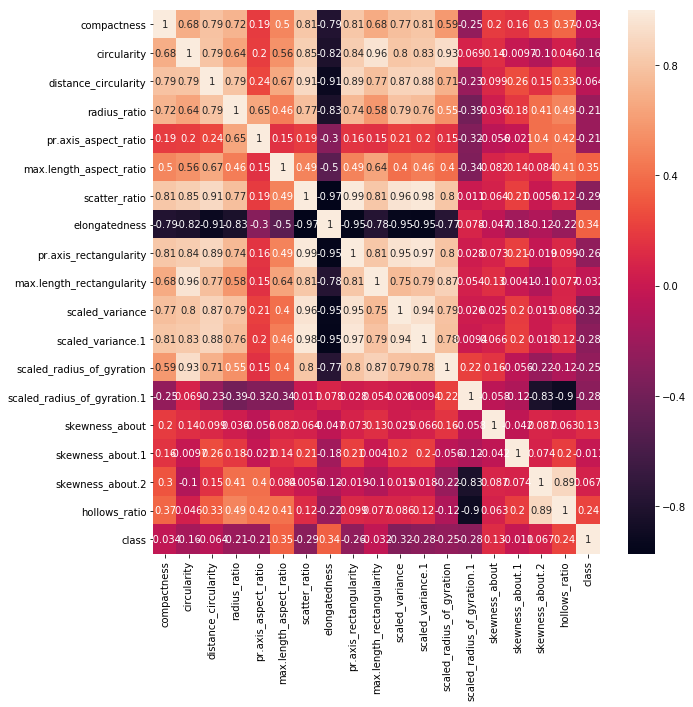

In [26]:
plt.figure(figsize=(10,10))
sns.heatmap(vehicle1_corr,annot=True)

In [27]:
vehicle1.var().sort_values(ascending=False)

scaled_variance.1              30396.550258
scatter_ratio                   1102.087967
scaled_radius_of_gyration       1059.260119
radius_ratio                    1033.487963
scaled_variance                  963.123533
distance_circularity             247.796994
max.length_rectangularity        210.704141
skewness_about.1                  78.809378
compactness                       67.806566
elongatedness                     61.025507
hollows_ratio                     55.335707
scaled_radius_of_gyration.1       37.931459
skewness_about.2                  37.850145
circularity                       37.629299
pr.axis_aspect_ratio              31.510905
skewness_about                    20.911871
pr.axis_rectangularity             6.700632
max.length_aspect_ratio            4.260568
class                              0.492986
dtype: float64

Heat map shows us the correlation between the features.If two features are highly correlated than there is no point in taking both the features as it will only create what we call 'curse of dimensionality',leading to skewed results.For a very large number  removal of multi-collinearity improves the interpretation of the parameters of the machine learning model and  reduces the time and storage space required.

######  We can drop the features having a correlation of > 0.85 between each other . In this case for eg  pr.axis_rectangularity vs eleongatedness  and scaled_variance vs scaled_variance1 have  > 0.95 correlation so one of the dimension among these can be dropped like we can drop either of scaled_variance or scaled_variance1 and either of elongatedness or pr.axis_rectangularity .In all, almost half of the features have some multicollinearity Here , we are going for unsupervised method PCA , so we leave it to PCA to reduce the dimensions for us. 

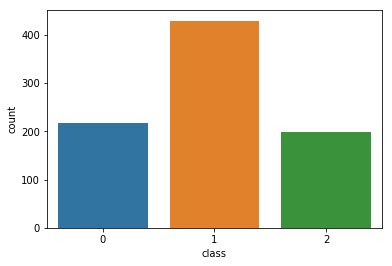

In [28]:
sns.countplot(vehicle1['class'])

The data is now ready for PCA and train-test split but before that we need to standadize the data.scaling done separately to test and train to avoid data leakage 

In [29]:
X = vehicle1.drop('class',axis=1)     # split features set and label set
y = vehicle1[['class']]

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=7)

In [31]:
from sklearn.preprocessing import StandardScaler      # perform standardization before creating PCA dimensions
sc = StandardScaler()
X_train_ss = sc.fit_transform(X_train)
X_test_ss = sc.fit_transform(X_test)
print(X_train_ss.shape,X_test_ss.shape)

(676, 18) (170, 18)


create covariance matrix of  18*18 matrix as 18 independent features

In [32]:
from sklearn.decomposition import PCA
cov_matrix = np.cov(X_train_ss.T)
print(cov_matrix.shape)
cov_matrix

(18, 18)


array([[ 1.00148148,  0.68910267,  0.79755338,  0.72099415,  0.19942047,
         0.49556743,  0.82255067, -0.79713492,  0.82483846,  0.68359803,
         0.77443505,  0.81582013,  0.59318414, -0.23206881,  0.1799055 ,
         0.13510033,  0.29364099,  0.34543779],
       [ 0.68910267,  1.00148148,  0.79248223,  0.64376888,  0.20520249,
         0.55901158,  0.84884222, -0.82268203,  0.84470695,  0.96303682,
         0.80354399,  0.82688219,  0.92535104,  0.06135492,  0.1229737 ,
        -0.02070173, -0.10151819,  0.04802406],
       [ 0.79755338,  0.79248223,  1.00148148,  0.79637256,  0.24978069,
         0.67043229,  0.90709258, -0.9152849 ,  0.89395034,  0.77496209,
         0.86605992,  0.88570026,  0.7074416 , -0.23406704,  0.08883057,
         0.24117813,  0.15441031,  0.33550714],
       [ 0.72099415,  0.64376888,  0.79637256,  1.00148148,  0.65341864,
         0.47212563,  0.77042058, -0.82661161,  0.74446797,  0.58839936,
         0.78530955,  0.76150119,  0.55415334, -0.389

From covariance matrix  above we will find eigen value and eigen vectors

In [33]:
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eigenvectors)
print('\n Eigen Values \n%s', eigenvalues)

Eigen Vectors 
%s [[-2.73825420e-01 -7.68417538e-02 -5.58050499e-02 -1.23286859e-01
   1.44001931e-01  2.84221366e-01 -2.02639835e-01  7.33251061e-01
  -3.84172117e-01  2.09671987e-01  5.30776747e-03 -3.28369021e-02
   1.81650919e-02  6.02129155e-02  5.85089077e-02 -1.29529484e-01
  -6.00181595e-02  1.21182746e-02]
 [-2.87300141e-01  1.29009307e-01 -1.87453986e-01  7.41773186e-02
  -1.34893601e-01 -1.05359615e-01  3.90917024e-01  7.93443667e-02
  -6.26942861e-02 -1.82854836e-01  3.47288406e-02 -1.73506312e-01
   4.78223186e-02  8.45761270e-02 -6.36524078e-01 -2.11317433e-01
  -2.64977322e-01 -2.71325160e-01]
 [-3.02505315e-01 -4.79292902e-02  3.62932544e-02 -1.25470868e-01
  -7.91456171e-02 -8.35231297e-03 -1.80357127e-01 -2.68461937e-01
  -1.36740717e-02  3.91206698e-01  2.35494672e-01 -6.91311117e-01
  -4.30132902e-03 -2.41301651e-01 -1.26927451e-02  1.04350994e-01
   1.19292879e-01 -8.98577055e-02]
 [-2.70181323e-01 -1.96017293e-01  1.07303882e-01  2.30408198e-01
   1.26097772e-01 -

In [34]:
print("Eigen Values:")
pd.DataFrame(eigenvalues).transpose()

Eigen Values:


0         1         2         3         4         5        6   \
0  9.752064  3.359186  1.205468  1.121158  0.893887  0.644937  0.31201   

         7         8         9         10        11        12        13  \
0  0.227527  0.132351  0.080007  0.080741  0.062469  0.005684  0.040137   

         14        15        16        17  
0  0.020676  0.023545  0.033553  0.031266

In [35]:
tot = sum(eigenvalues)
var_exp = [( i /tot ) * 100 for i in sorted(eigenvalues, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 54.09798652  72.73252329  79.41966251  85.63910418  90.5977949
  94.17548033  95.90630487  97.16847607  97.90267096  98.35057077
  98.794396    99.14093368  99.36358911  99.54971717  99.72316098
  99.85377563  99.96847093 100.        ]


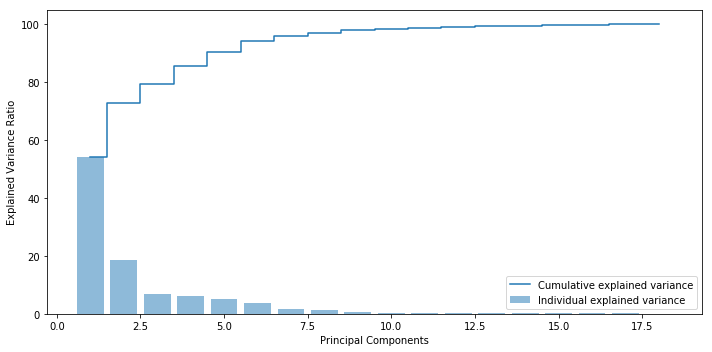

In [36]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eigenvalues.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eigenvalues.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

###### From above plot only 9 dimensions can explain 95% of  data, so first 9 PCA dimensions will be used 

In [37]:
eigen_pairs = [(np.abs(eigenvalues[i]), eigenvectors[:,i]) for i in range(len(eigenvalues))]
eigen_pairs.sort(reverse=True)
eigen_pairs[:10]

[(9.752063702679024,
  array([-0.27382542, -0.28730014, -0.30250531, -0.27018132, -0.09951299,
         -0.19416725, -0.31043872,  0.30910878, -0.30716178, -0.27891398,
         -0.29889454, -0.30533268, -0.26385838,  0.04262714, -0.03043179,
         -0.05216445, -0.03987955, -0.08404396])),
 (3.359185828263533,
  array([-0.07684175,  0.12900931, -0.04792929, -0.19601729, -0.26738617,
         -0.1199643 ,  0.07616962, -0.01176757,  0.0894102 ,  0.12195254,
          0.08211287,  0.07097396,  0.20972653,  0.50140723, -0.01433821,
         -0.08837821, -0.49948623, -0.50730781])),
 (1.20546829766827,
  array([-0.05580505, -0.18745399,  0.03629325,  0.10730388,  0.07273125,
         -0.20281671,  0.1033409 , -0.10140004,  0.09419356, -0.21552977,
          0.14911076,  0.10148478, -0.17953833,  0.10466781, -0.61838361,
          0.60142329, -0.0505366 , -0.06180162])),
 (1.1211580174191618,
  array([-0.12328686,  0.07417732, -0.12547087,  0.2304082 ,  0.60566313,
         -0.25102552, -

Make a set of (eigenvalue, eigenvector) pairs and sort them in decreasing order to take the best components

In [38]:
eig_pairs = [(eigenvalues[index], eigenvectors[:,index]) for index in range(len(eigenvalues))]
eig_pairs.sort()
eig_pairs.reverse()
print(eig_pairs)

[(9.752063702679024, array([-0.27382542, -0.28730014, -0.30250531, -0.27018132, -0.09951299,
       -0.19416725, -0.31043872,  0.30910878, -0.30716178, -0.27891398,
       -0.29889454, -0.30533268, -0.26385838,  0.04262714, -0.03043179,
       -0.05216445, -0.03987955, -0.08404396])), (3.359185828263533, array([-0.07684175,  0.12900931, -0.04792929, -0.19601729, -0.26738617,
       -0.1199643 ,  0.07616962, -0.01176757,  0.0894102 ,  0.12195254,
        0.08211287,  0.07097396,  0.20972653,  0.50140723, -0.01433821,
       -0.08837821, -0.49948623, -0.50730781])), (1.20546829766827, array([-0.05580505, -0.18745399,  0.03629325,  0.10730388,  0.07273125,
       -0.20281671,  0.1033409 , -0.10140004,  0.09419356, -0.21552977,
        0.14911076,  0.10148478, -0.17953833,  0.10466781, -0.61838361,
        0.60142329, -0.0505366 , -0.06180162])), (1.1211580174191618, array([-0.12328686,  0.07417732, -0.12547087,  0.2304082 ,  0.60566313,
       -0.25102552, -0.02815015, -0.04546773, -0.052

In [39]:
eigvalues_sorted = [eig_pairs[index][0] for index in range(len(eigenvalues))]
eigvectors_sorted = [eig_pairs[index][1] for index in range(len(eigenvalues))]
print('Eigenvalues in descending order: \n%s' %eigvalues_sorted)

Eigenvalues in descending order: 
[9.752063702679024, 3.359185828263533, 1.20546829766827, 1.1211580174191618, 0.8938866476416172, 0.6449374267198517, 0.3120099716968083, 0.22752739328427235, 0.1323508671448278, 0.08074140422763701, 0.08000689570526383, 0.06246919165218591, 0.04013735357163777, 0.033552684271452186, 0.03126613650972583, 0.023545467631199975, 0.02067574012338931, 0.005683640456832958]


In [40]:
pca_reduce = np.array(eigvectors_sorted[0:9])  # reduing the dimensons
X_pca_reduced = np.dot(X_train_ss,pca_reduce.T)   #projecting original data into principal component dimensions
X_train_pca = pd.DataFrame(X_pca_reduced)  # converting array to dataframe for pairplot
X_train_pca.shape

(676, 9)

In [41]:
X_test_pca_reduced = np.dot(X_test_ss,pca_reduce.T)
X_test_pca = pd.DataFrame(X_test_pca_reduced)
X_test_pca.shape

(170, 9)

In [42]:
X_pca_reduced.shape

(676, 9)

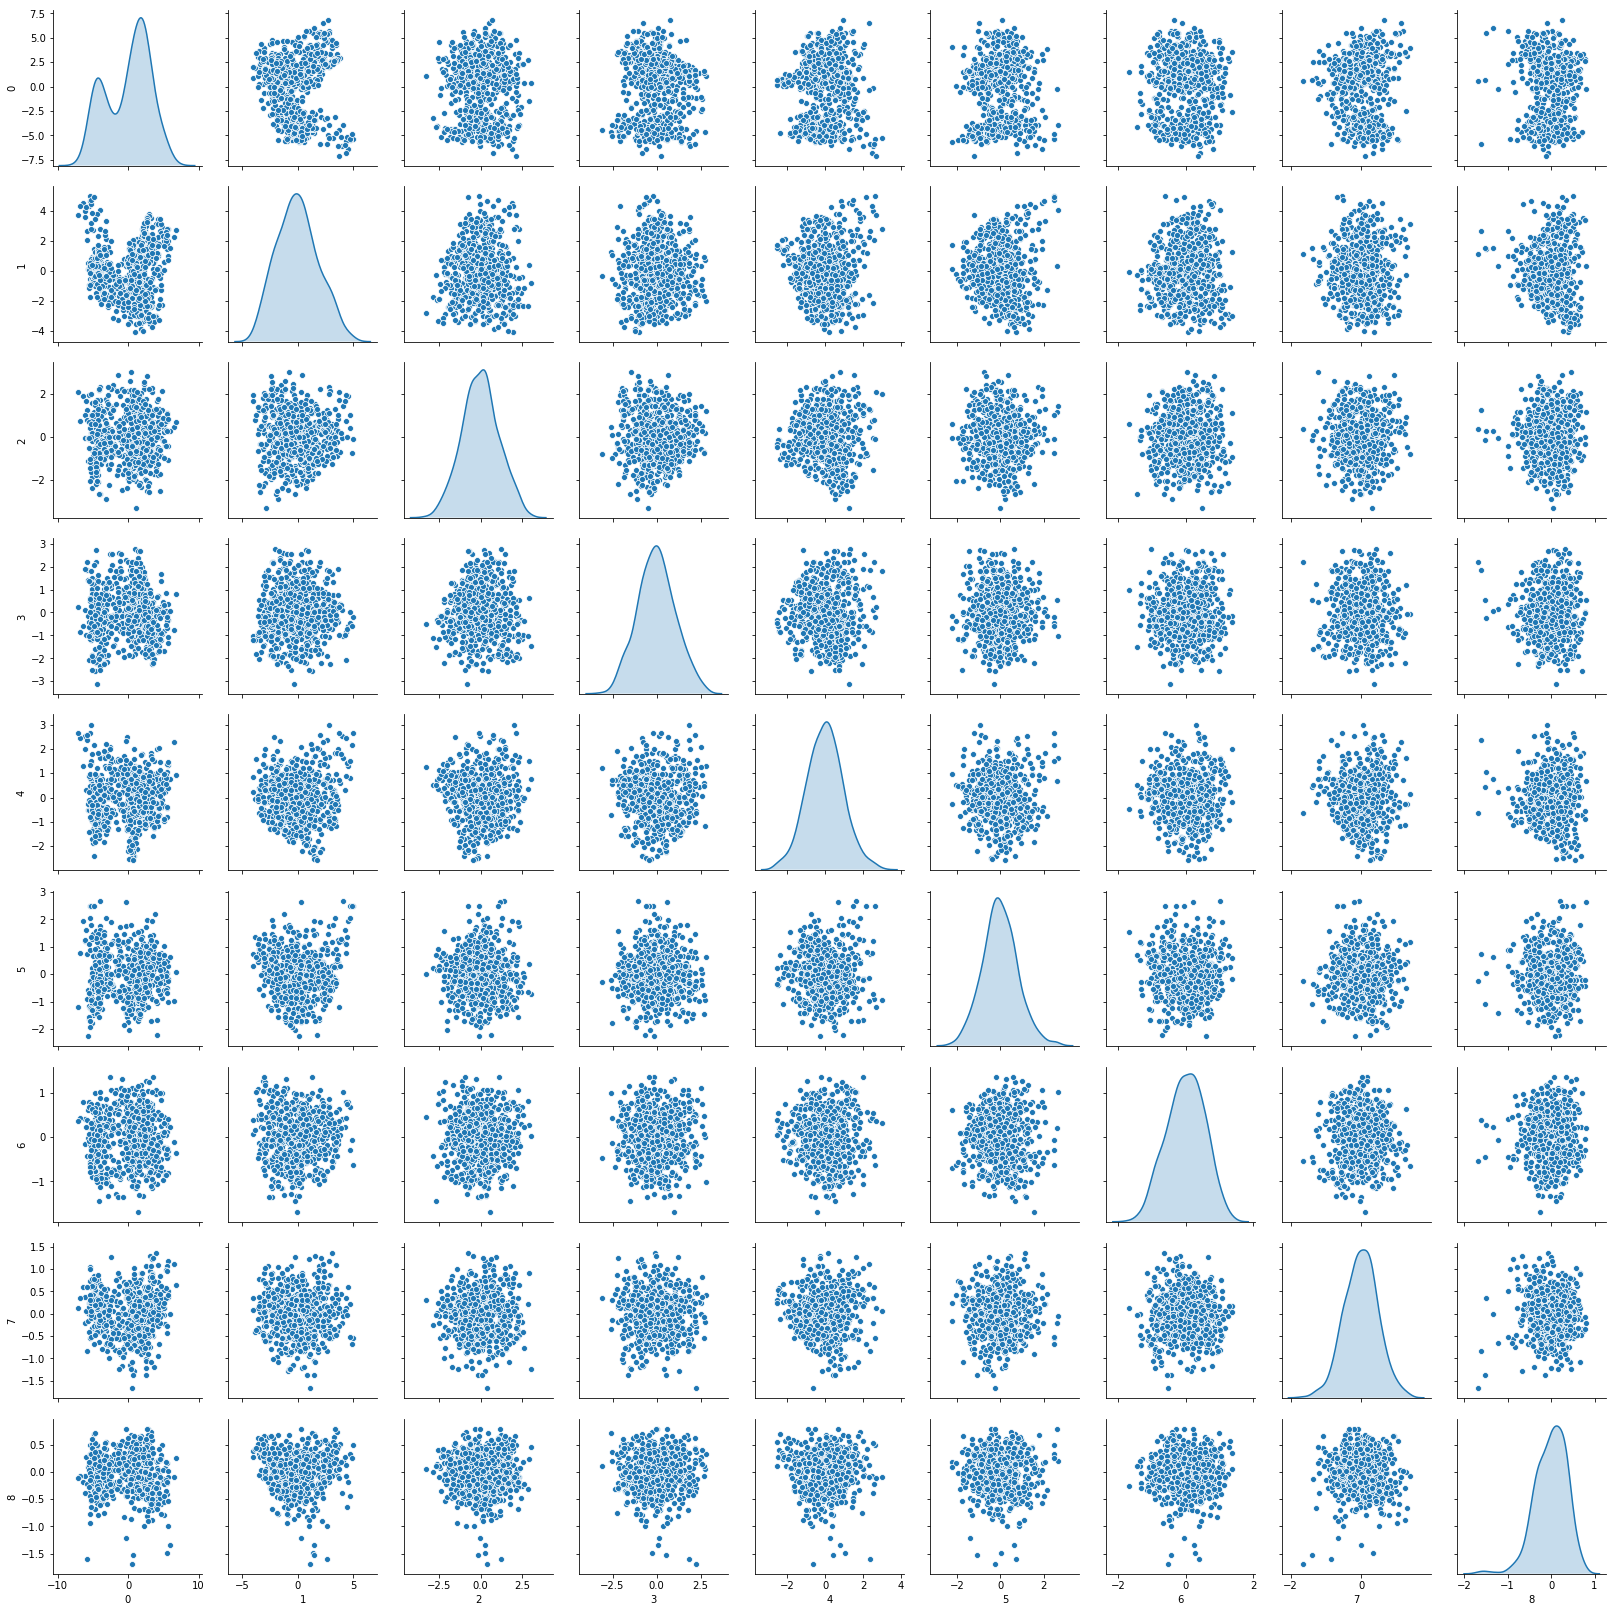

In [43]:
sns.pairplot(X_train_pca, diag_kind='kde')

Now the components are without any positive or negative correlation and form a cloud visual. 

###### Support vector machine implementation without PCA and with PCA

In [44]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn import metrics

In [85]:
model_pca = SVC()   #instantiate the object
model_pca.fit(X_train_ss,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [86]:
pca_predict = model_pca.predict(X_test_ss)

In [87]:
model_pca.score(X_test_ss, y_test)   # Accuracy score without PCA and optimization

0.9588235294117647

In [88]:
metrics.confusion_matrix(y_test,pca_predict)

array([[42,  0,  0],
       [ 1, 82,  2],
       [ 0,  4, 39]], dtype=int64)

In [89]:
print(metrics.classification_report(y_test,pca_predict))

              precision    recall  f1-score   support

           0       0.98      1.00      0.99        42
           1       0.95      0.96      0.96        85
           2       0.95      0.91      0.93        43

   micro avg       0.96      0.96      0.96       170
   macro avg       0.96      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



##### Using grid search ( C values - 0.01, 0.05, 0.5, 1 and kernel= linear, rbf) for the best hyperparameters and perform cross-validation to find the accuracy.

In [56]:
# tweaking parameters using grid search iterations
model_pca1 = SVC()   #instantiate the object
param_grid = {'C': [0.01, 0.05, 0.5, 1], 'kernel': ['linear', 'rbf']}
model_pca1f = GridSearchCV(model_pca1, param_grid, verbose=5)
model_pca1f.fit(X_train_pca,y_train)
print("Best Hyper Parameters:\n",model_pca1f.best_params_)

C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\model_selection\_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
[Parallel(n_jobs=1)]: Done   2 o

Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8716814159292036, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8097345132743363, total=   0.0s
[CV] C=0.01, kernel=linear ...........................................
[CV] .. C=0.01, kernel=linear, score=0.8526785714285714, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5088495575221239, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5088495575221239, total=   0.0s
[CV] C=0.01, kernel=rbf ..............................................
[CV] ..... C=0.01, kernel=rbf, score=0.5089285714285714, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, k

C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set


[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, kernel=linear, score=0.8362831858407079, total=   0.0s
[CV] C=0.05, kernel=linear ...........................................
[CV] .. C=0.05, kernel=linear, score=0.8660714285714286, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5973451327433629, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5663716814159292, total=   0.0s
[CV] C=0.05, kernel=rbf ..............................................
[CV] ..... C=0.05, kernel=rbf, score=0.5491071428571429, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.9292035398230089, total=   0.0s
[CV] C=0.5, kernel=linear ............................................
[CV] ... C=0.5, kernel=linear, score=0.8628318584070797, total=   0.0s
[CV] 

C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to

[CV] ...... C=0.5, kernel=rbf, score=0.9292035398230089, total=   0.0s
[CV] C=0.5, kernel=rbf ...............................................
[CV] ...... C=0.5, kernel=rbf, score=0.9241071428571429, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ...... C=1, kernel=linear, score=0.915929203539823, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8672566371681416, total=   0.0s
[CV] C=1, kernel=linear ..............................................
[CV] ..... C=1, kernel=linear, score=0.8973214285714286, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.9380530973451328, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] ........ C=1, kernel=rbf, score=0.9336283185840708, total=   0.0s
[CV] C=1, kernel=rbf .................................................
[CV] .

C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
[Parallel(n_jobs=1)]: Done  24 out of  24 | elapsed:    0.5s finished
C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\utils\validation.py:761: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\Anita\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The defaul

##### from grid search Best Hyper Parameters:
 {'C': 1, 'kernel': 'rbf'}  so we go with these parameters

Build the model with the best hyper parameters and cross validation to find the accuracy

In [90]:
from sklearn.model_selection import cross_val_score
import warnings 
warnings.simplefilter('ignore')
model_PCA = SVC(C=1, kernel="rbf",random_state=7)    #using best parameter
model_PCA.fit(X_train_pca,y_train)

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=7,
  shrinking=True, tol=0.001, verbose=False)

In [91]:
pca_predict1 = model_PCA.predict(X_test_pca)
model_PCA.score(X_test_pca, y_test)

0.9647058823529412

In [97]:
metrics.confusion_matrix(y_test,pca_predict1)    

array([[42,  0,  0],
       [ 0, 83,  2],
       [ 0,  4, 39]], dtype=int64)

Notation: bus 0
car 1
van 2

Text(0.5, 15.0, 'Predicted label')

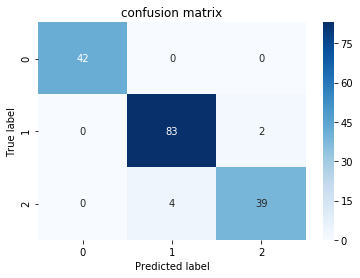

In [105]:
sns.heatmap(metrics.confusion_matrix(y_test,pca_predict1),cmap="Blues",annot=True)
plt.title('confusion matrix')
plt.ylabel('True label')
plt.xlabel('Predicted label')

In [98]:
print(metrics.classification_report(y_test,pca_predict1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        42
           1       0.95      0.98      0.97        85
           2       0.95      0.91      0.93        43

   micro avg       0.96      0.96      0.96       170
   macro avg       0.97      0.96      0.96       170
weighted avg       0.96      0.96      0.96       170



Accuracy is slightly high after optimizing SVM and PCA implementation. Accuracy seems to be in overfitting zone as data size is not big


K-fold Validation may optimize the accuracy:

In [96]:
scores = cross_val_score(model_PCA,X_train_pca,y_train, cv=10)  # K-fold validation = 10
print(scores)
print("Mean accuracy: ",scores.mean())

[0.95652174 0.92753623 0.95652174 0.94202899 0.91176471 0.98529412
 0.93939394 0.95454545 0.90909091 0.93939394]
Mean accuracy:  0.9422091761605828


In [112]:
rsqure_score = model_PCA.score(X_train_pca,y_train)
print('R^2: {}'.format(rsqure_score))

R^2: 0.9689349112426036


######  As can be seen from results, though not a high difference in the accuracy observed with or without PCA , but when there are large number of features thrn it is very useful as the same or better  results can be obtained with less feature without requiring too much info of those feature. 
###### PCA renders non-collinearity  between features which is exactly what is needed for model bulid, decreasing number of feature.
###### Most of the information about data is within those reduced features , like we had 95% of  variance covered by 9 features which is just half of our original feature